In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from quenched_galaxies import tools
from quenched_galaxies import definitions

all_data = definitions.data
#

#

/home/aemerick/code/quenched_galaxies/definitions.py:278: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_20Myr']   = _np.log10(data['SCSAM']['SFR_20Myr'])
/home/aemerick/code/quenched_galaxies/definitions.py:279: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_100Myr']  = _np.log10(data['SCSAM']['SFR_100Myr'])
/home/aemerick/code/quenched_galaxies/definitions.py:280: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_1Gyr']    = _np.log10(data['SCSAM']['SFR_1Gyr'])
/home/aemerick/code/quenched_galaxies/definitions.py:328: RuntimeWarning: divide by zero encountered in log10
  data['Brooks']['log_' + k] = _np.log10(data['Brooks'][k])
/home/aemerick/code/quenched_galaxies/definitions.py:337: RuntimeWarning: divide by zero encountered in log10
  data['Illustris']['log_SFR_' + k] = _np.log10(data['Illustris']['SFR_' + k])
/home/aemerick/code/quenched_galaxies/definitions.py:385: RuntimeWarning: divide by ze

CAUTION: HI Approximation on - For data with no explicit HI mass, HI mass is taken as the cold gas mass times the constant factor  0.735


In [2]:
observational_limits = None

def compute_and_plot(axis, xdata, ydata, fgas, xbins, label, remove_zero = False, include_range = 'IQR', *args, **kwargs):

            # assume ydata is logged - compute stats on un-logged data
            ydata = 10.0**(ydata)
            if remove_zero:
                xdata = xdata[ydata>0.01] # ONLY those with gas
                ydata = ydata[ydata>0.01]

            if observational_limits == 'Bradford':
                cut = fgas_limits(xdata, fgas)
                xdata   = xdata[cut]
                ydata   = ydata[cut]

            # check number of points in bins - plot low number counts as scatter
            scatter_select, line_select = tools.select_scatter_points(xdata, xbins)
            axis.scatter(xdata[scatter_select], np.log10(ydata[scatter_select]), s = definitions.point_size, **kwargs)
            x,median,std,Q1,Q3,average, N = tools.compute_statistics(xdata[line_select] , ydata[line_select], xbins)

            # scatter plot points that don't have proper statistics
            
            fill_low = None ; fill_up = None
            if include_range == 'std':
                fill_up = median + std
                fill_low = median - std
                fill_low[fill_low < 0] = 0
                axis.plot(x, np.log10(average), lw = definitions.line_width, label = label, *args, **kwargs)
                #print label, x, average
            elif include_range == 'IQR':
                fill_up = Q3
                fill_low = Q1
                fill_low[fill_low < 0] = 0
                axis.plot(x, np.log10(median), lw = definitions.line_width, label = label, *args, **kwargs)
                #print label, x, median

            if not (fill_low is None):
                if 'color' in kwargs.keys():
                    facecolor = kwargs['color']
                else:
                    facecolor = 'black'
                axis.fill_between(x, np.log10(fill_low), np.log10(fill_up), facecolor = facecolor,
                                interpolate = True, lw = definitions.line_width, alpha = 0.25, *args, **kwargs)

            return

In [3]:
XY = np.array([(8.361538461538462, 7.523809523809523),
      (8.976923076923077, 8.162464985994397),
       (9.438461538461539, 8.868347338935573),
      (10.038461538461538, 9.383753501400559),
     (10.46923076923077, 9.551820728291315),
     (10.961538461538462, 9.350140056022408),
    (11.46923076923077, 9.126050420168067)])

crain_x = XY[:,0]
crain_y = XY[:,1]

In [4]:
print [k for k in all_data['EAGLE'].keys() if 'old' in k]

['log_MHI_2Rh_old', 'log_Mcold_gas_2Rh', 'log_Mcold', 'log_MH2_1Rh_old', 'MHI_old', 'Mcold', 'log_MH2_old', 'Mcold_gas_2Rh', 'Mcold_gas', 'MH2_old', 'log_MHI_1Rh_old', 'log_Mcold_gas_1Rh', 'log_Mcold_gas', 'Mcold_gas_1Rh', 'r_half_old', 'log_MHI_old', 'log_MH2_2Rh_old']


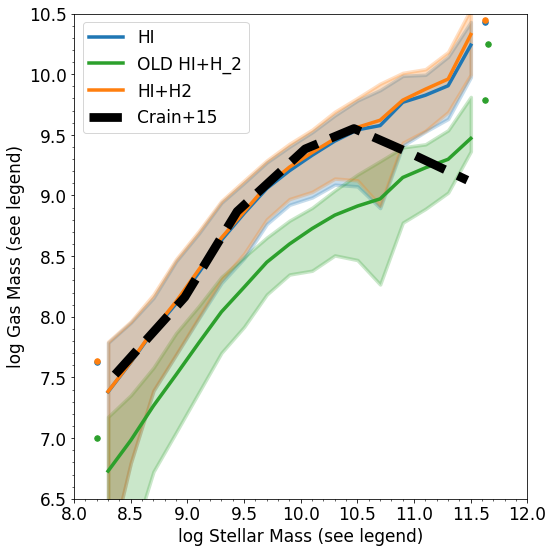

In [5]:
mstar_bins = np.arange(7.0,13.1,0.2)

#
# Plot a lot of different things here
#
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

name = 'EAGLE'
pdata = all_data[name]

#
# Plot total cold gas vs. total Stellar mass
#
#x = pdata['log_Mstar_30']
#y = pdata['log_Mcold']
#compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "All Cold - Star in 30 ", color = 'black')

#
# Plot gas in 70 kpc and stellar mass in 30 kpc
#
#x = pdata['log_Mstar_30']
#y = np.log10(10.0**(pdata['log_Mcold']) * 0.735)
#compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "All Cold * 0.73 - S in 30", color = 'C2')

#
# Plot HI in 70 kpc and stellar mass in 30 kpc
#
x = pdata['log_Mstar_30']
y = pdata['log_MHI'] 
compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "HI", color = 'C0')

x = pdata['log_Mstar_30']
y = np.log10(10.0**pdata['log_MHI_old'] + 10.0**pdata['log_MH2_old'])
compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "OLD HI+H_2", color = 'C2')

#
# Plot gas in 70 kpc and stellar mass in 30 kpc
#
#x = pdata['log_Mstar_30']
#y = pdata['log_Mgas_70']
#compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "All Gas in 70 - S in 30", color = 'C1')

#
# Plot all HI + all H2 and stellar mass in 30 kpc
#
x = pdata['log_Mstar_30']
y = np.log10(10.0**pdata['log_MHI'] + 10.0**pdata['log_MH2'])
compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "HI+H2", color = 'C1')

#
# Do the same as above for the old masses: Plot all HI + all H2 and stellar mass in 30 kpc
#
#x = pdata['log_Mstar_30']
#y = np.log10(10.0**pdata['log_MHI_old'] + 10.0**pdata['log_MH2_old'])
#compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "All HI+H2 (OLD) - S in 30", color = 'C4')



#x = pdata['log_Mstar_30']
#y = pdata['log_MH_p']
#compute_and_plot(ax, x, y, pdata['fgas'], mstar_bins, "H from particle - S in 30", color = 'C5')


if False:
    ax.plot(definitions.brown_15['log_Mstar'], definitions.brown_15['log_MHI'], color = definitions.colors['brown15'], lw = 3)
    ax.scatter(definitions.brown_15['log_Mstar'], definitions.brown_15['log_MHI'], color = definitions.colors['brown15'], 
                marker = 's', s = 3*definitions.point_size, label = 'Brown-15')

    ax.plot(definitions.cantinella_13['log_Mstar'], definitions.cantinella_13['log_MHI'], color = definitions.colors['catinella13'], lw = 3)
    ax.scatter(definitions.cantinella_13['log_Mstar'], definitions.cantinella_13['log_MHI'], color = definitions.colors['catinella13'], 
               marker = 'o', s = 3*definitions.point_size, label = 'Catinella-13')

ax.plot(crain_x, crain_y, lw = definitions.line_width*2.5, color = 'black', ls = '--', label = "Crain+15")
    
ax.set_xlabel(r'log Stellar Mass (see legend)')
ax.set_ylabel(r'log Gas Mass (see legend)')
plt.minorticks_on()

ax.legend(loc = 'upper left', ncol=1)
ax.set_ylim(6.5,10.5)
ax.set_xlim(8,12)
plt.tight_layout()
fig.savefig("EAGLE_method_comparison.png")

In [6]:
10**0.6

3.9810717055349722